In [1]:
from experiment_utils import *

import os
import matplotlib.pyplot as plt
import seaborn as sns

e:\Uni\master\nme-gt\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nme = [0, 5-2*np.sqrt(6), (5-np.sqrt(21))/2, 1/3, 0.5, 1]

# check if data file already exists. if not run experiments
if not os.path.exists('data/gate_cut.csv'):
    df = run_experiments(1000, nme, 5000, n_rounds=1)
    if not os.path.exists('data'):
        os.makedirs('data')
    df.to_csv('data/gate_cut.csv')
else:
    df = pd.read_csv('data/gate_cut.csv')

<Figure size 640x480 with 0 Axes>

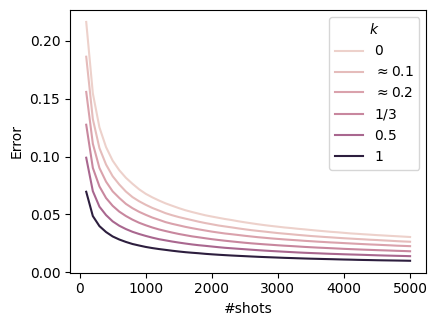

In [3]:
df_mean = df.groupby(['k', 'shots']).mean(numeric_only=True).reset_index()
plt.figure(figsize=plt.figure().get_size_inches()*.7)
ax = sns.lineplot(data=df_mean, x='shots', y='error', hue='k')
ax.set(xlabel='#shots', ylabel='Error')
legend_handles, _ = ax.get_legend_handles_labels()
ax.legend(legend_handles, ["$0$", "$\\approx 0.1$", "$\\approx 0.2$", "$1/3$", "$0.5$", "$1$"], title='$k$')
plt.tight_layout()
plt.savefig('data/gate_cut.svg')